# **AIML-PROJECT**
# **Insurance Claim Fraud Detection**
# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Reading Dataset**

In [5]:
dataframe = pd.read_csv('insurance_claims.csv')

In [6]:
dataframe.head()


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
dataframe.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# **Data Preprocessing**

# looking for missing values

In [ ]:
# looking for missing values
dataframe.isna().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

# generate a bar-chart for Visualizing Missing Values

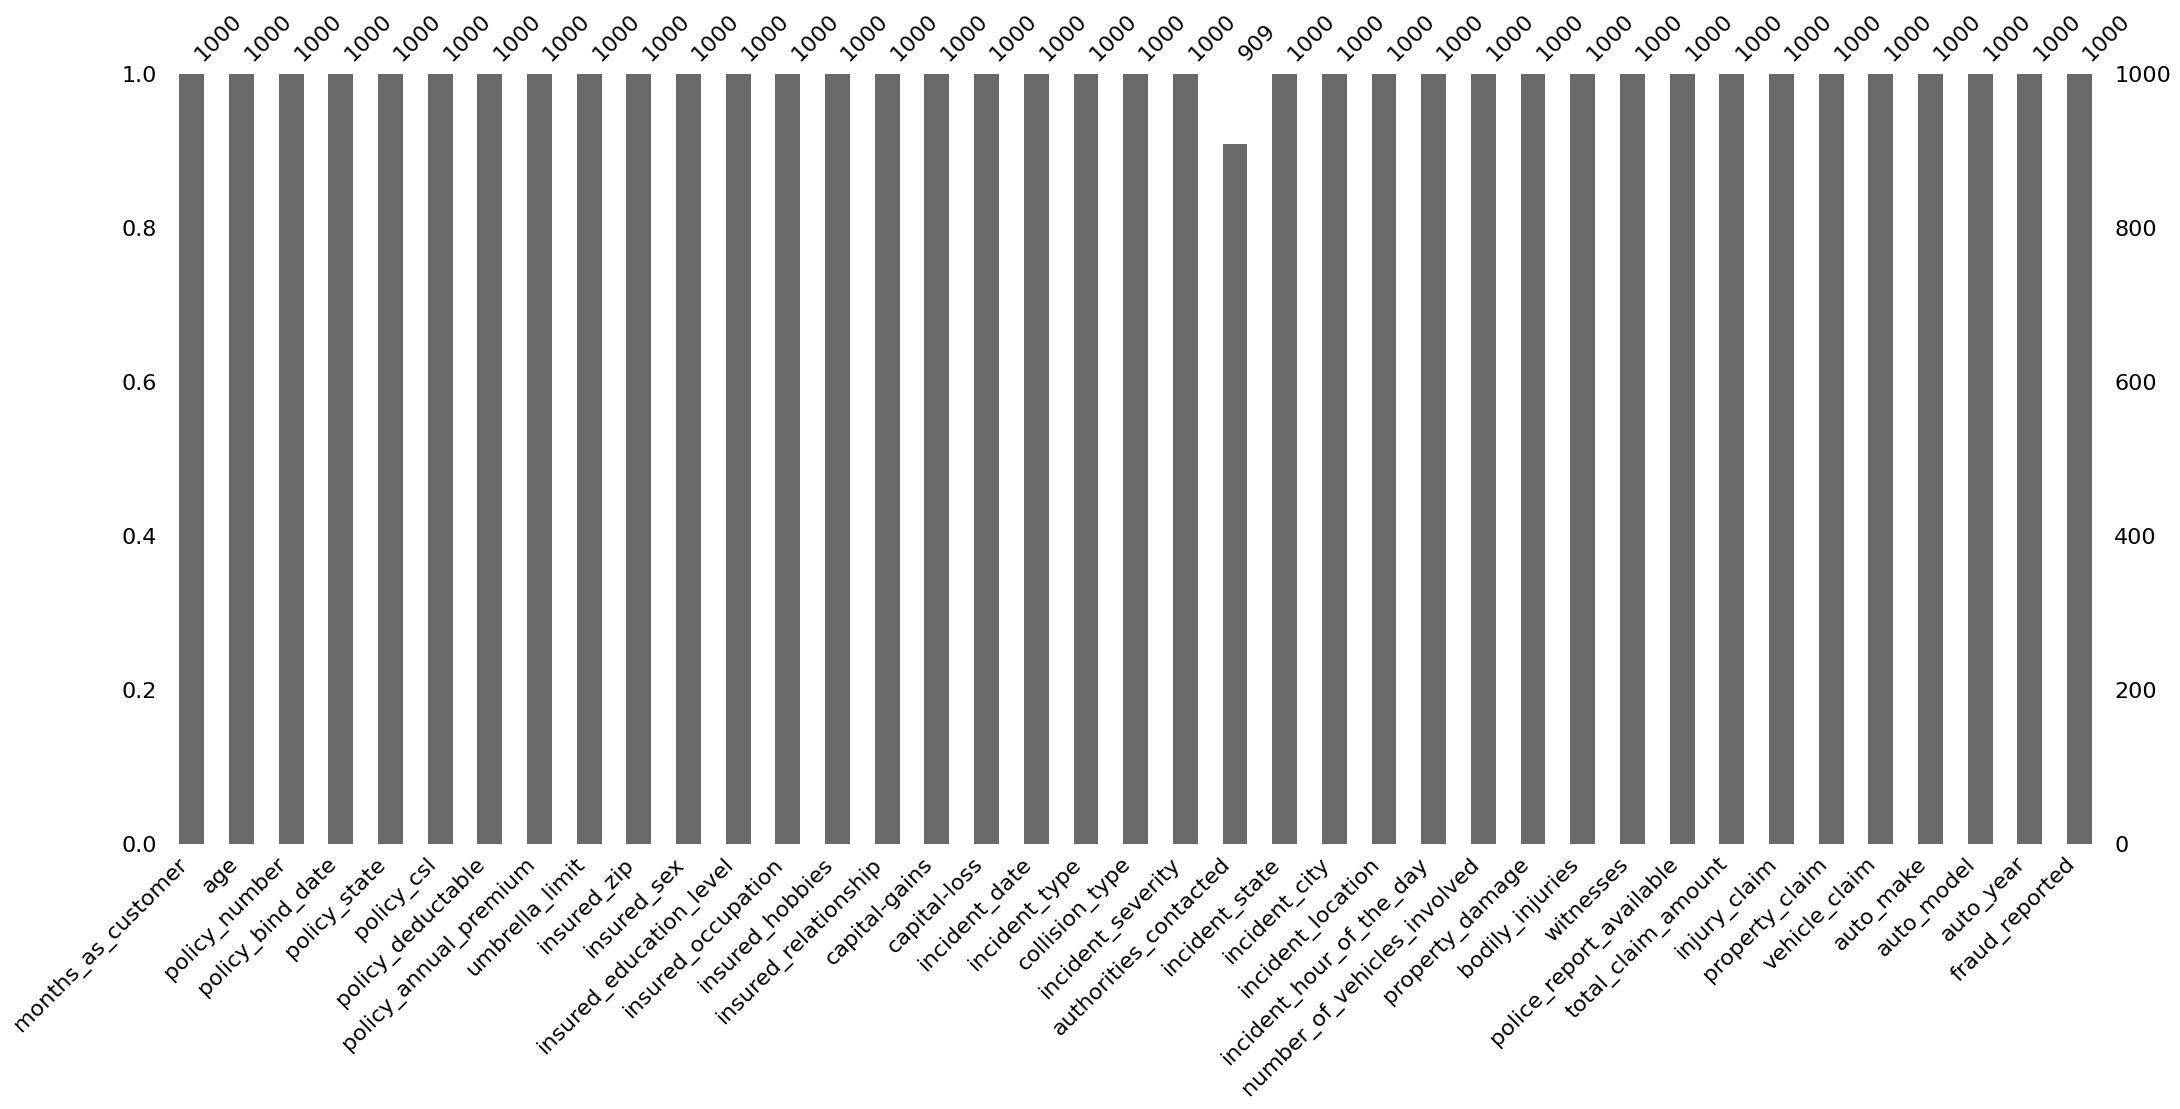

In [ ]:
import missingno as msno

msno.bar(dataframe)
plt.show()

# We will handle the missing value as we will allocate 0 to the missing values as a substitute

In [ ]:
dataframe['authorities_contacted'] = dataframe['authorities_contacted'].fillna(dataframe['authorities_contacted'].mode()[0])
dataframe.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# **Generate a Heat-Map**

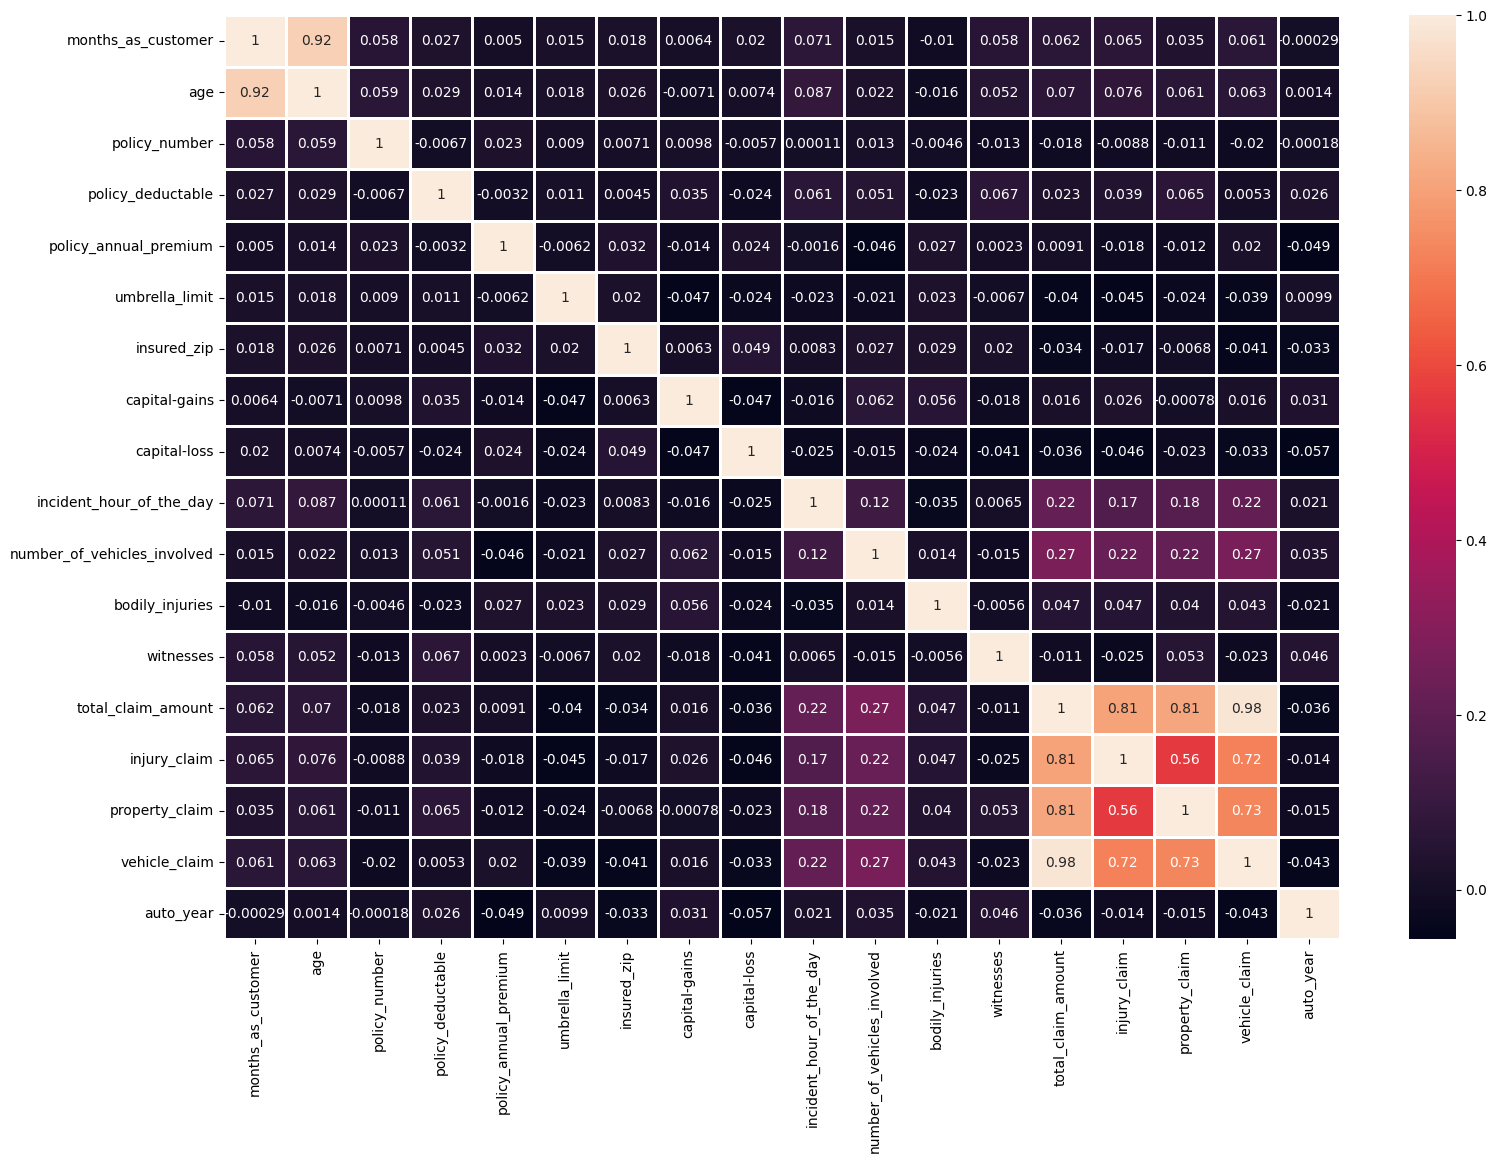

In [ ]:
numeric_data = dataframe.select_dtypes(include='number')

plt.figure(figsize=(18, 12))
corr = numeric_data.corr()
sns.heatmap(data=corr, annot=True, fmt='.2g', linewidth=1)
plt.show()

In [ ]:
dataframe.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

# droping columns

In [ ]:
# dropping columns that are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

dataframe.drop(to_drop, inplace = True, axis = 1)
dataframe.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


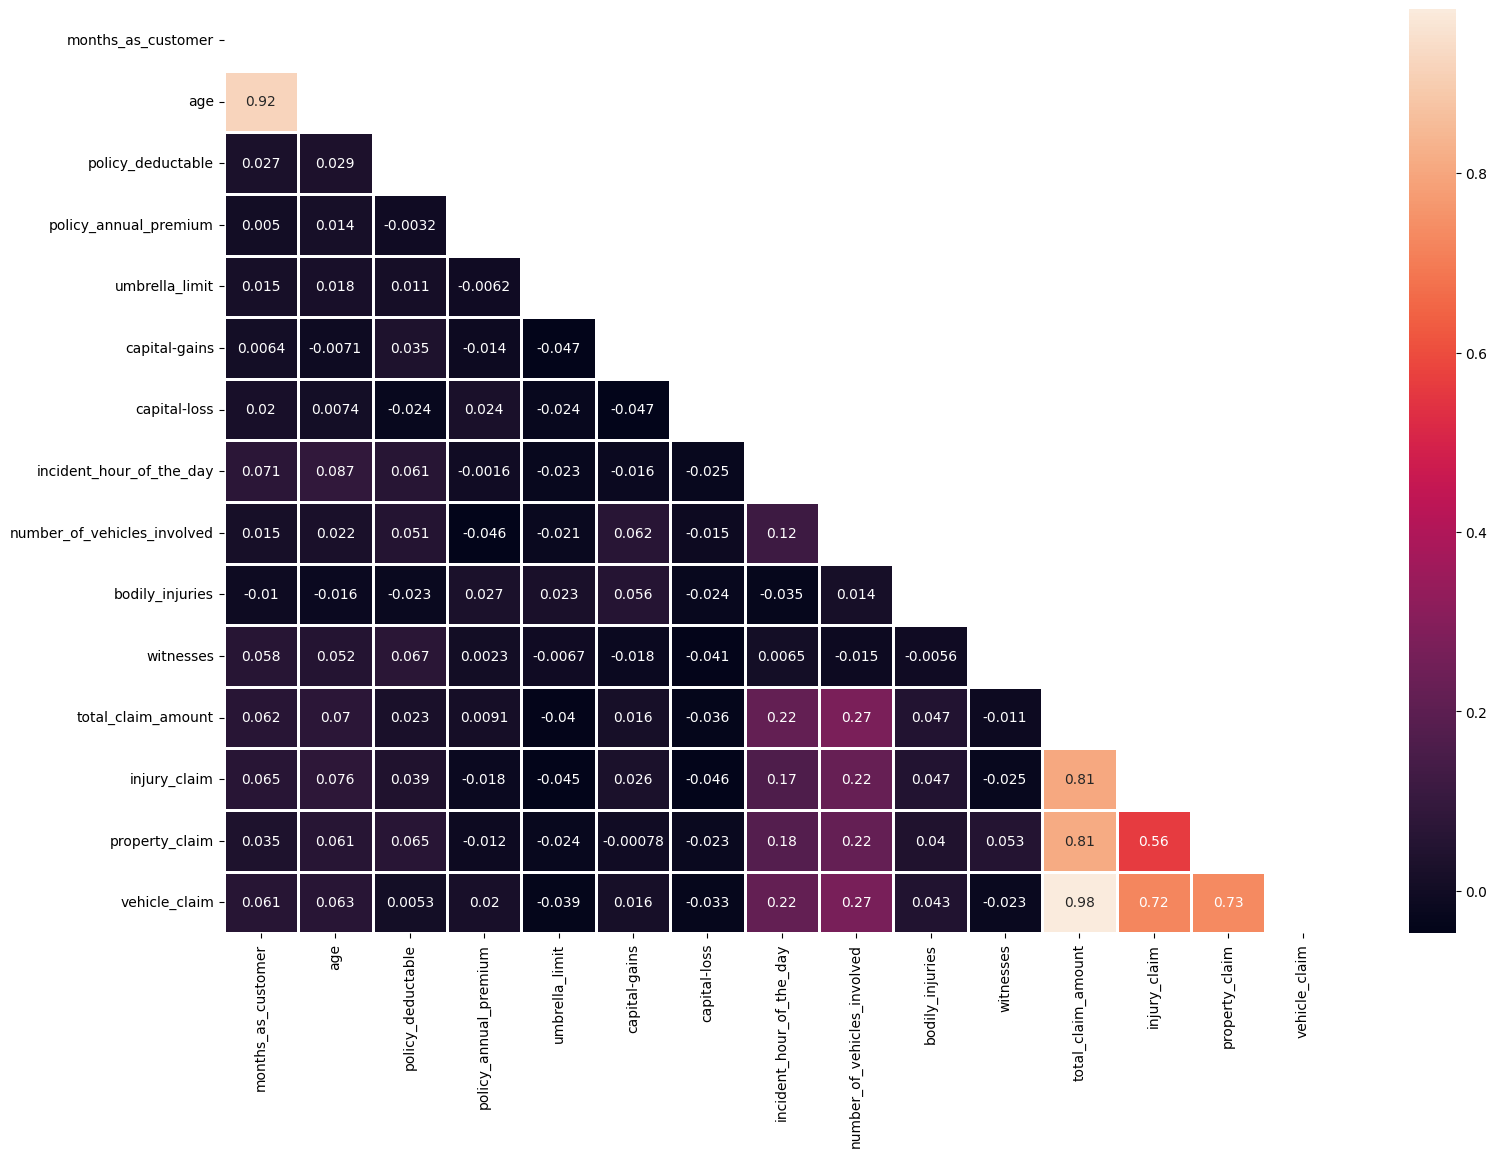

In [ ]:
# checking for multicollinearity
numeric_data = dataframe.select_dtypes(include='number')
plt.figure(figsize = (18, 12))

corr = numeric_data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

# High corelation between age and total_claim_amount

In [ ]:
dataframe.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)
dataframe.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,?,0,0,?,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,?,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

# separate feature and target colums

In [ ]:
# separating the feature and target columns

X = dataframe.drop('fraud_reported', axis = 1)
y = dataframe['fraud_reported']

In [ ]:
# extracting categorical columns
dataframe_cat = X.select_dtypes(include = ['object'])

In [ ]:
dataframe_cat.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,?,Minor Damage,Police,?,?
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,?,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,?,Minor Damage,Police,NO,NO


In [ ]:
# printing unique values of each column
for col in dataframe_cat.columns:
    print(f"{col}: \n{dataframe_cat[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' '?' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' '?' 'NO']

police_report_available: 
['YES' '?' 'NO']



In [ ]:
dataframe_cat = pd.get_dummies(dataframe_cat, drop_first = True)
dataframe_cat.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,True,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,True
1,True,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,True,False,False,False,False,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,True,False
4,False,True,True,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,True,False


In [ ]:
# extracting the numerical columns

dataframe_num = X.select_dtypes(include = ['int64'])
dataframe_num.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,650,4550


In [ ]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([dataframe_num, dataframe_cat], axis = 1)
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,False,False,False,False,False,True,False,True,False,True
1,228,2000,5000000,0,0,8,1,0,0,780,...,True,False,False,False,False,True,False,False,False,False
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,True,False,False,False,False,True,True,False,True,False
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,False,False,False,False,False,True,False,False,True,False
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,True,False,False,False,False,True,True,False,True,False


# generating a graph to check the data

<ipython-input-23-6ebae6b98a63>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])
<ipython-input-23-6ebae6b98a63>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[col])
<ipython-input-23-6ebae6b98a63>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v

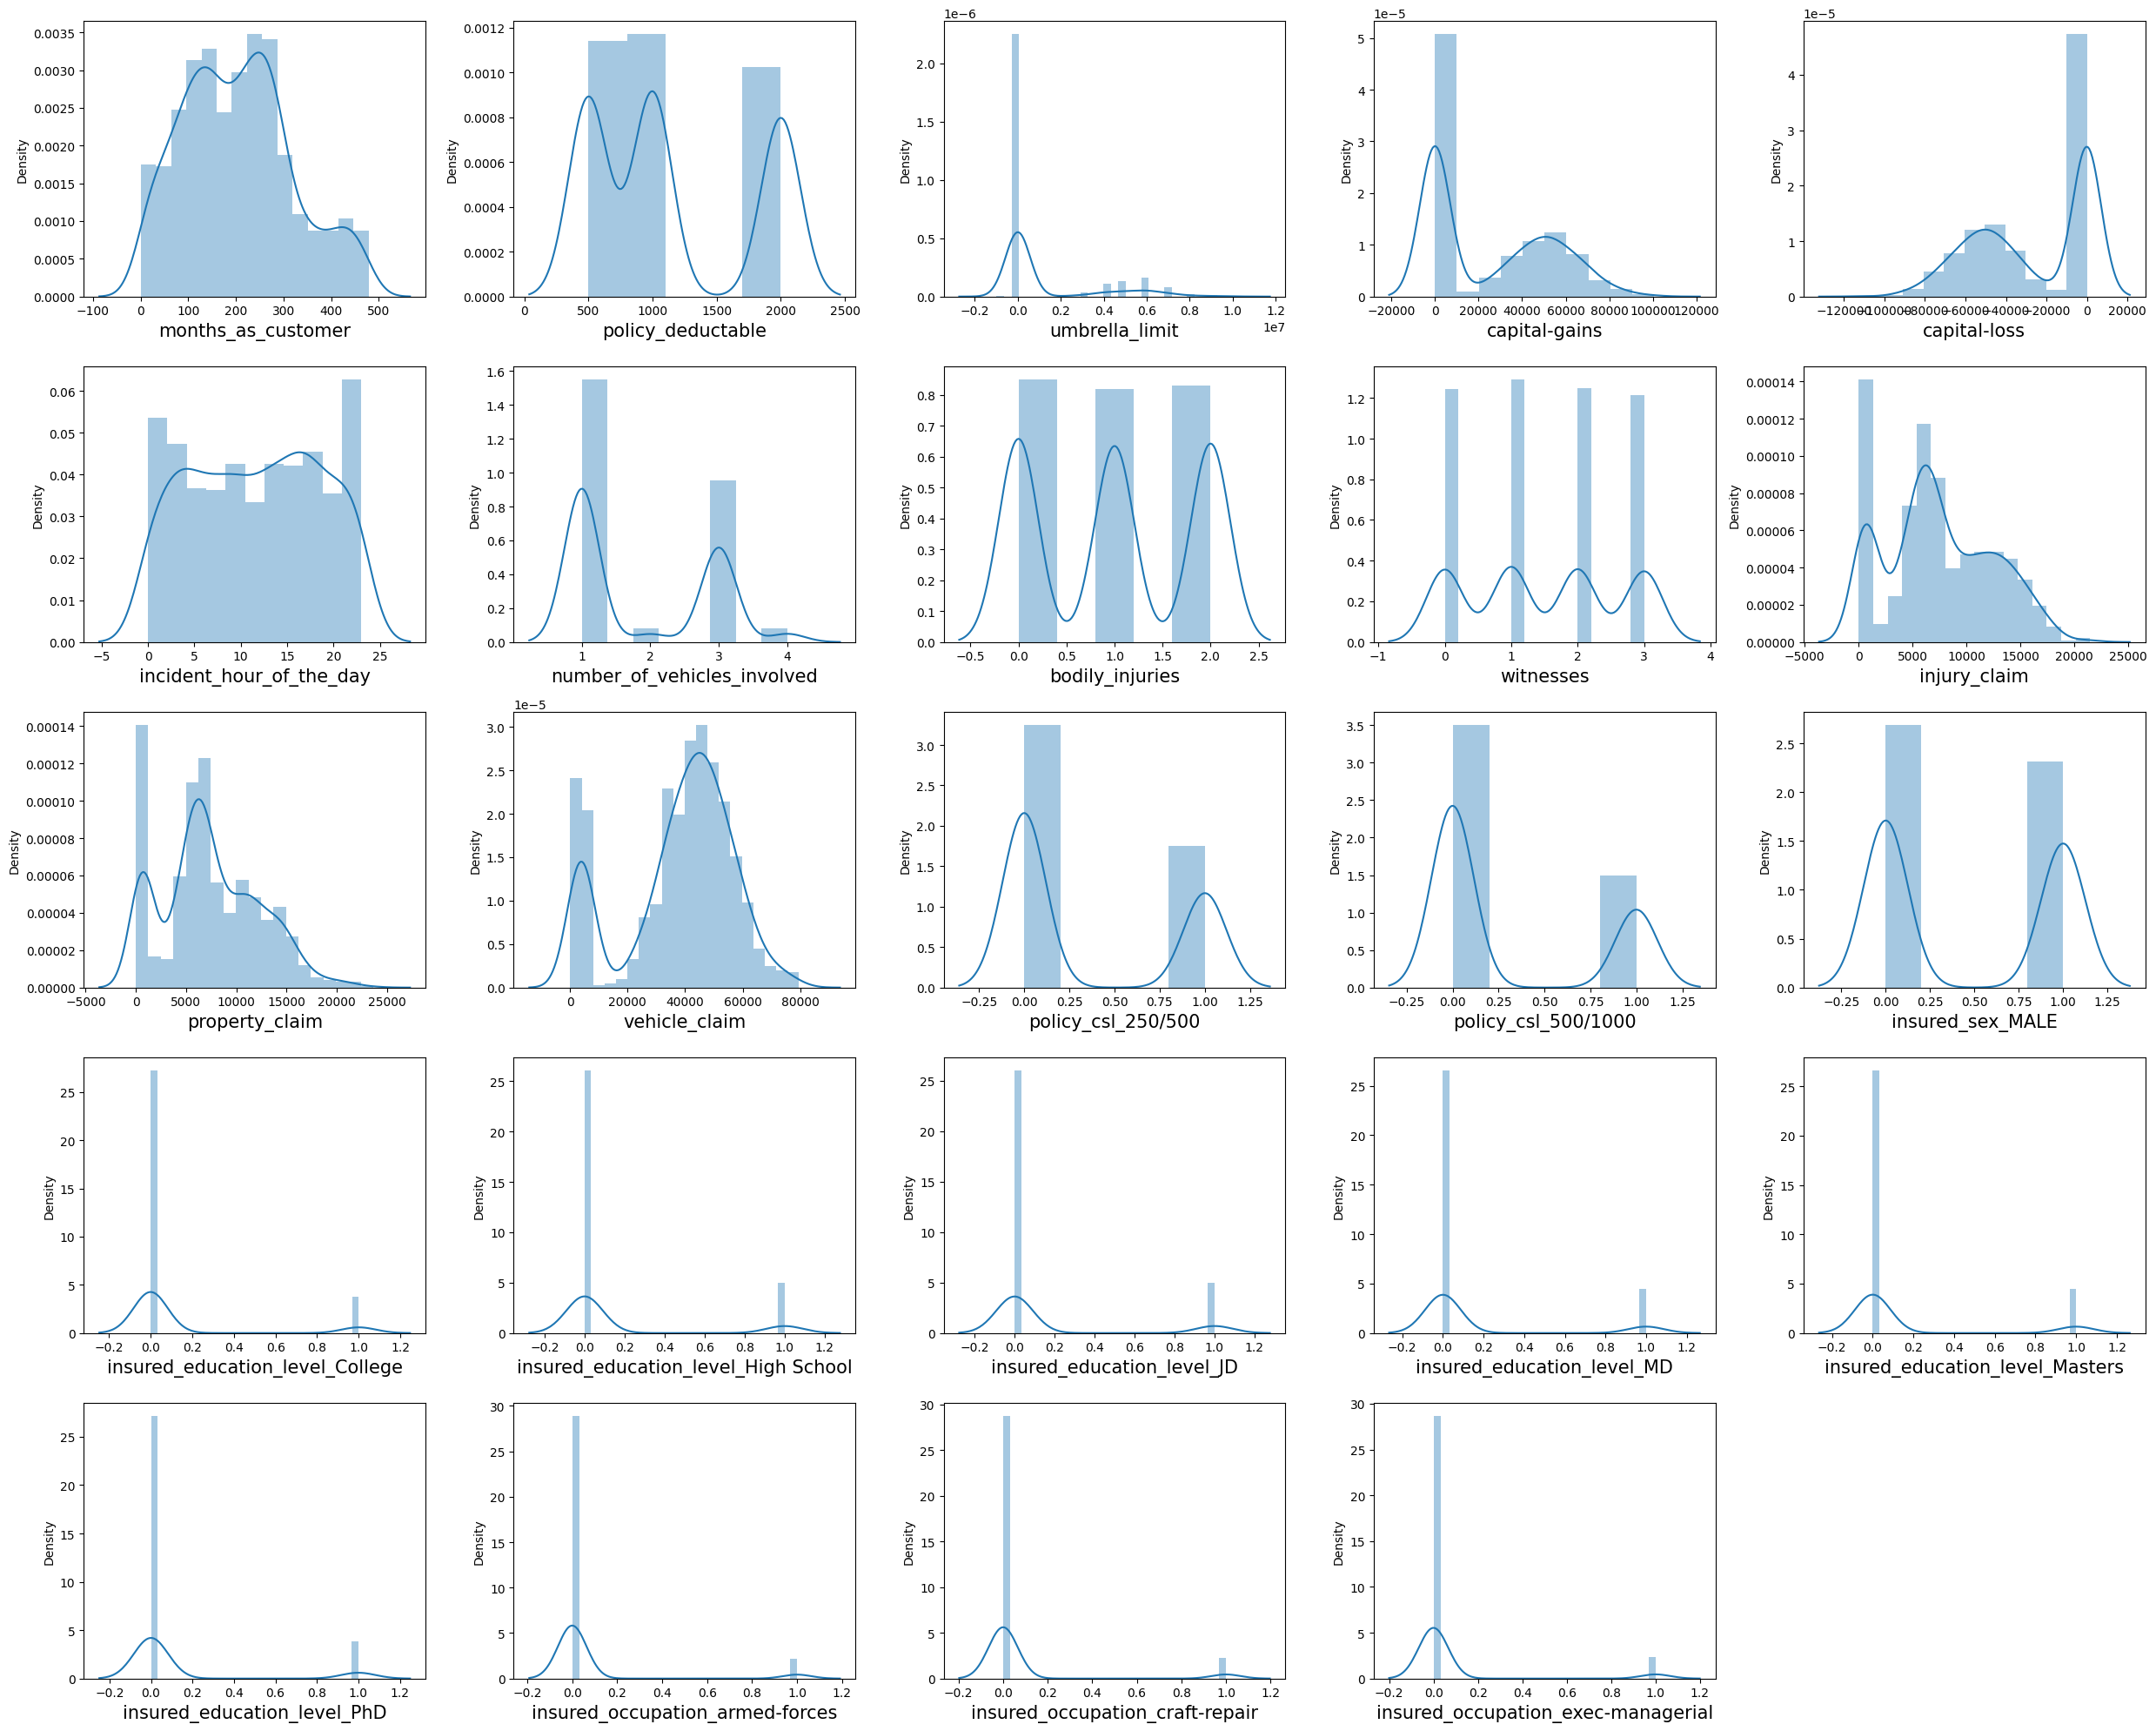

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

#  Let's check for outliers.

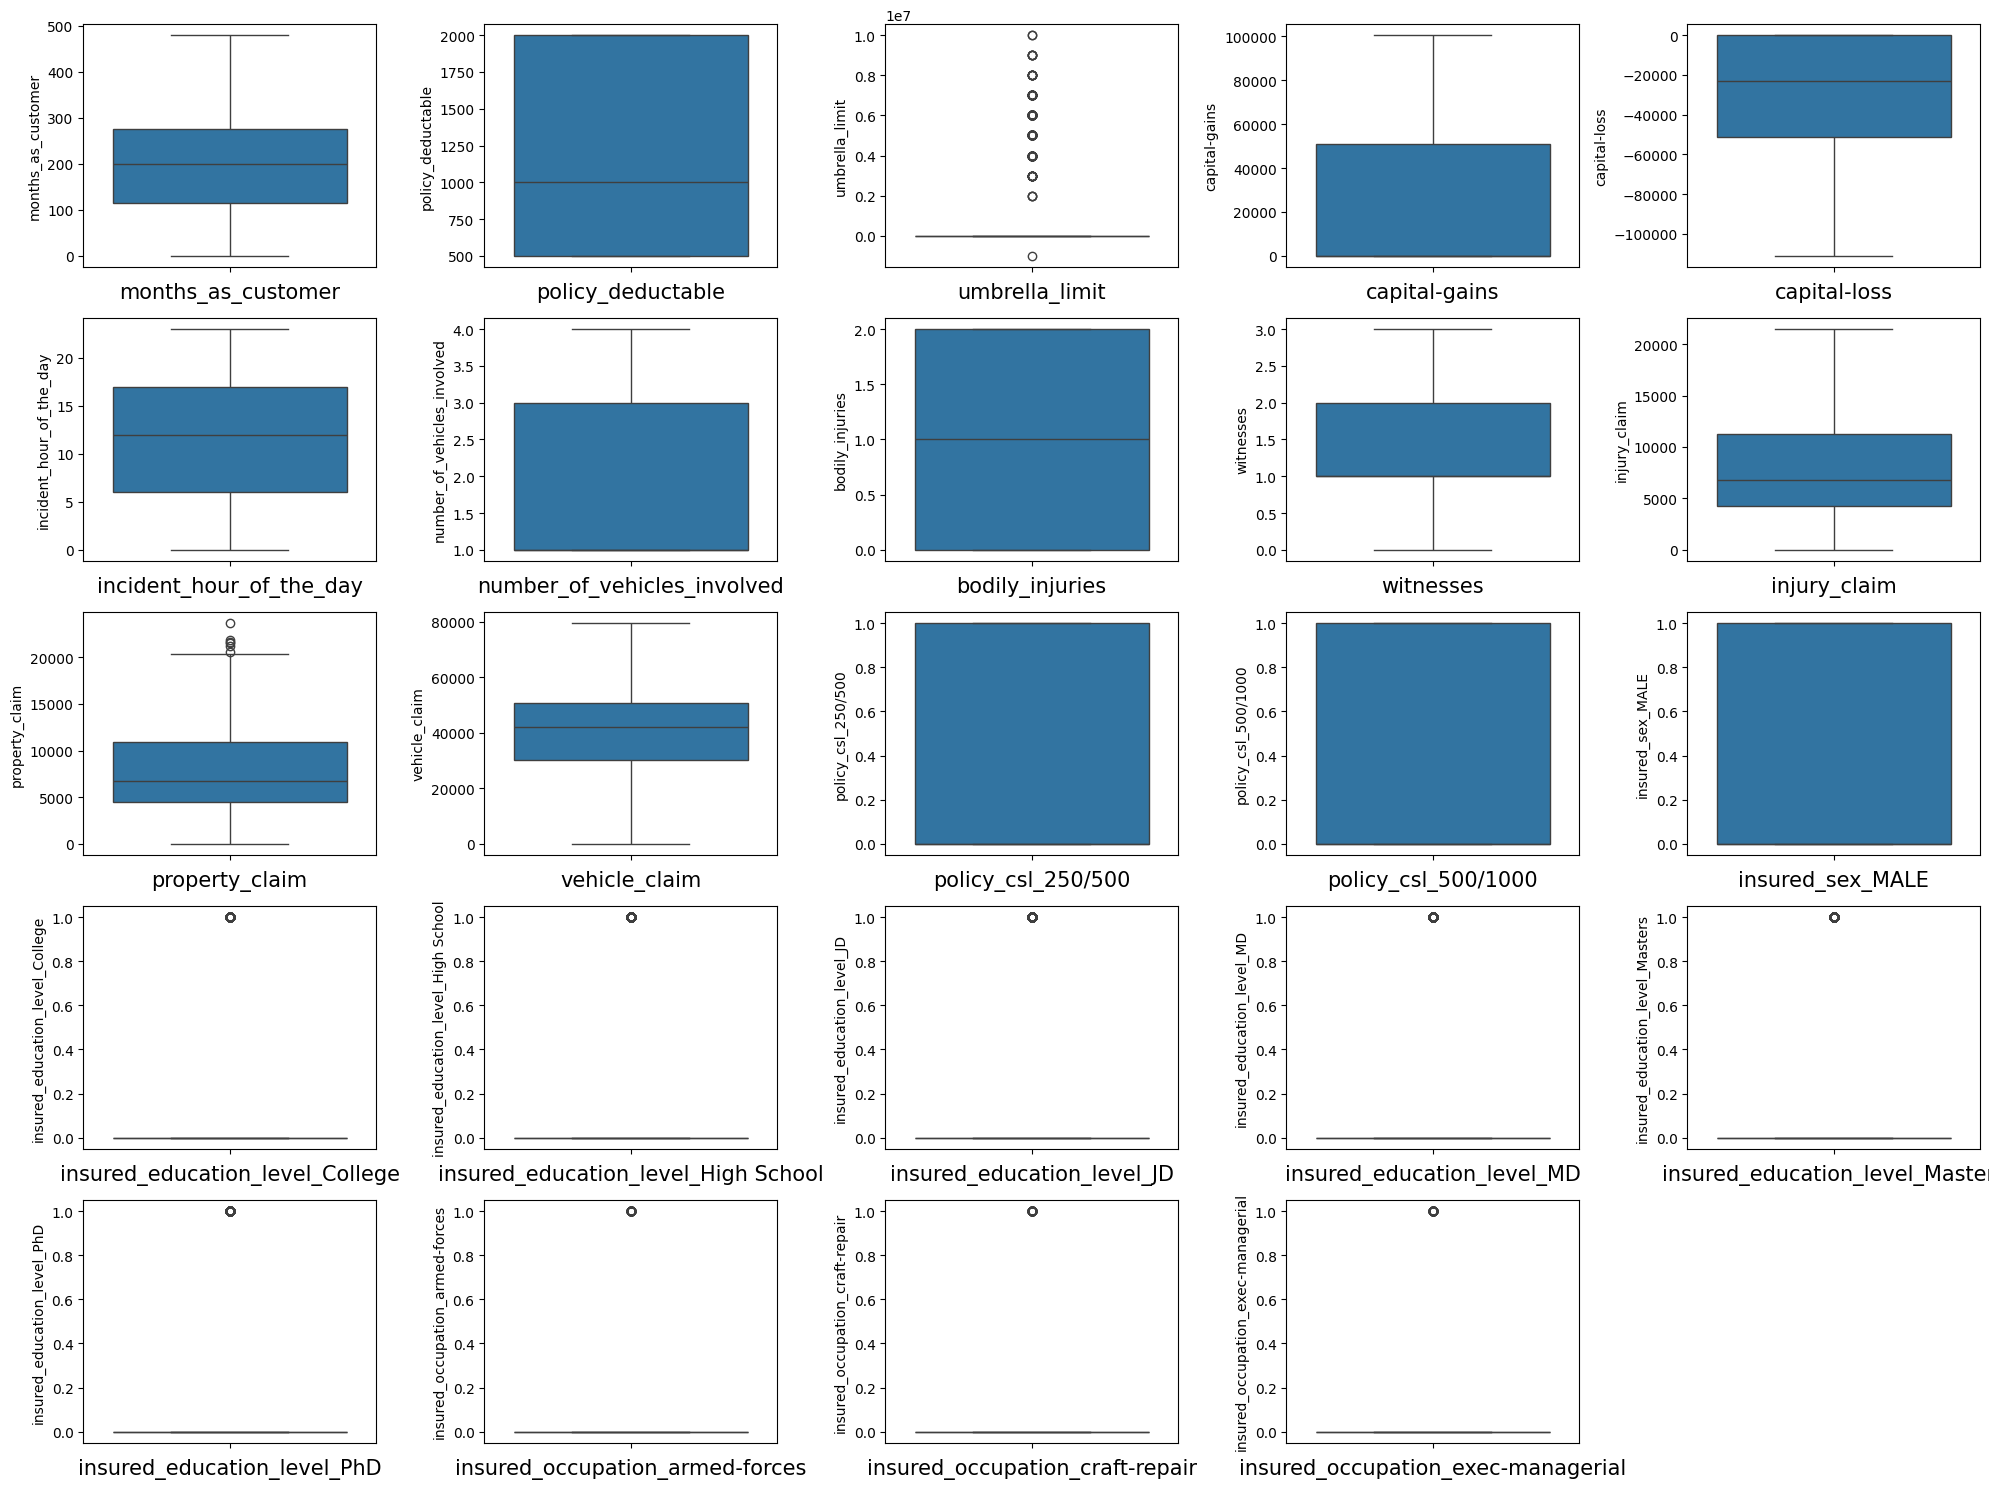

In [ ]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [ ]:
# splitting data into a training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
910,285,2000,0,46100,0,9,1,1,2,3720,...,True,False,False,False,False,True,True,False,False,True
933,36,1000,0,0,-59800,20,3,1,3,5420,...,True,False,False,False,False,False,False,True,False,False
682,78,500,0,0,-66500,4,1,0,3,550,...,False,False,True,False,False,True,True,False,True,False
264,84,2000,0,44400,-51500,9,1,1,0,5240,...,True,False,False,False,False,True,True,False,False,True
273,107,500,0,62800,0,14,3,1,0,11940,...,True,False,False,False,False,False,False,False,True,False


In [ ]:
dataframe_num= X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [ ]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataframe_num)
scaled_dataframe_num = pd.DataFrame(data = scaled_data, columns = dataframe_num.columns, index = X_train.index)
scaled_dataframe_num.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
910,0.702838,1.392163,-0.492937,0.774310,0.946278,-0.390085,-0.808508,-0.026511,0.436559,-0.789970,-0.779640,-0.638295
933,-1.481141,-0.253420,-0.492937,-0.880106,-1.217081,1.207831,1.182891,-0.026511,1.326284,-0.437180,0.714111,-0.294895
682,-1.112759,-1.076211,-0.492937,-0.880106,-1.459465,-1.116411,-0.808508,-1.269207,1.326284,-1.447819,-1.329306,-1.785080
264,-1.060133,1.392163,-0.492937,0.713301,-0.916816,-0.390085,-0.808508,-0.026511,-1.342892,-0.474534,0.638584,0.203247
273,-0.858400,-1.076211,-0.492937,1.373632,0.946278,0.336240,1.182891,-0.026511,-1.342892,0.915873,0.944887,-0.120015


In [ ]:
X_train.drop(columns = scaled_dataframe_num.columns, inplace = True)
X_train = pd.concat([scaled_dataframe_num, X_train], axis = 1)
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
910,0.702838,1.392163,-0.492937,0.774310,0.946278,-0.390085,-0.808508,-0.026511,0.436559,-0.789970,...,True,False,False,False,False,True,True,False,False,True
933,-1.481141,-0.253420,-0.492937,-0.880106,-1.217081,1.207831,1.182891,-0.026511,1.326284,-0.437180,...,True,False,False,False,False,False,False,True,False,False
682,-1.112759,-1.076211,-0.492937,-0.880106,-1.459465,-1.116411,-0.808508,-1.269207,1.326284,-1.447819,...,False,False,True,False,False,True,True,False,True,False
264,-1.060133,1.392163,-0.492937,0.713301,-0.916816,-0.390085,-0.808508,-0.026511,-1.342892,-0.474534,...,True,False,False,False,False,True,True,False,False,True
273,-0.858400,-1.076211,-0.492937,1.373632,0.946278,0.336240,1.182891,-0.026511,-1.342892,0.915873,...,True,False,False,False,False,False,False,False,True,False


# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc_dt_train = accuracy_score(y_train, dt.predict(X_train))
acc_dt_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {acc_dt_train}")
print(f"Test accuracy of Decision Tree is : {acc_dt_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.404
[[ 49 141]
 [  8  52]]
              precision    recall  f1-score   support

           N       0.86      0.26      0.40       190
           Y       0.27      0.87      0.41        60

    accuracy                           0.40       250
   macro avg       0.56      0.56      0.40       250
weighted avg       0.72      0.40      0.40       250



In [ ]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

params_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

search_grid = GridSearchCV(dt, params_grid, cv = 5, n_jobs = -1, verbose = 1)
search_grid.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
# best parameters and the best score

print(search_grid.best_params_)
print(search_grid.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.8


In [ ]:
# best estimator

dt = search_grid.best_estimator_

y_pred = dt.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc_dt_train = accuracy_score(y_train, dt.predict(X_train))
acc_dt_test = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {acc_dt_train}")
print(f"Test accuracy of Decision Tree is : {acc_dt_test}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8013333333333333
Test accuracy of Decision Tree is : 0.764
[[148  42]
 [ 17  43]]
              precision    recall  f1-score   support

           N       0.90      0.78      0.83       190
           Y       0.51      0.72      0.59        60

    accuracy                           0.76       250
   macro avg       0.70      0.75      0.71       250
weighted avg       0.80      0.76      0.78       250



# checking the model performance

In [ ]:
models = pd.DataFrame({
    'Model' : ['Decision Tree'],
    'Score' : [acc_dt_test]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Decision Tree,0.764


# Visualizing the model performance

In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')